# Snake AI Training Analysis

This notebook provides comprehensive analysis of training sessions, including:
- Loading and visualizing training data from CSV files
- Comparing different strategy performances
- Analyzing reward components
- Creating interactive plots and dashboards

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import os
import glob
from pathlib import Path
import sys

# Add the src directory to Python path to import our modules
sys.path.append('../src')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Training Data

Load training data from your project's CSV files. Adjust the path to point to your actual project data location.

In [2]:
# Function to find and load training data
def load_training_data(project_name=None):
    """
    Load training data from CSV files.
    If project_name is None, looks for the most recent training data.
    """
    # Adjust this path to your actual data location
    # This is typically in the user's roaming data directory
    data_path = Path.home() / "AppData" / "Roaming" / "SnakeAI"
    
    if not data_path.exists():
        print(f"Data path not found: {data_path}")
        print("Please adjust the data_path variable to point to your project data.")
        return None
    
    # Find all CSV files
    csv_files = list(data_path.glob("**/logs/*training_data*.csv"))
    
    if not csv_files:
        print("No training data CSV files found.")
        print(f"Looking in: {data_path}")
        return None
    
    print(f"Found {len(csv_files)} training data files:")
    for file in csv_files[-5:]:  # Show last 5 files
        print(f"  {file.name} - {file.stat().st_mtime}")
    
    # Load the most recent file if no specific project specified
    if project_name is None:
        latest_file = max(csv_files, key=lambda x: x.stat().st_mtime)
    else:
        # Find files matching project name
        matching_files = [f for f in csv_files if project_name.lower() in f.parent.parent.name.lower()]
        if not matching_files:
            print(f"No files found for project: {project_name}")
            return None
        latest_file = max(matching_files, key=lambda x: x.stat().st_mtime)
    
    print(f"\nLoading: {latest_file}")
    
    try:
        df = pd.read_csv(latest_file)
        print(f"Loaded {len(df)} episodes of training data")
        print(f"Columns: {list(df.columns)}")
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Load the data
df = load_training_data()
if df is not None:
    print("\nFirst few rows:")
    display(df.head())
    print("\nData info:")
    display(df.info())

Found 5 training data files:
  training_data_session_1_1754161696.csv - 1754161696.5073593
  training_data_session_2_1754164610.csv - 1754164612.0944345
  training_data_session_1_1754235775.csv - 1754235782.9844968
  training_data_session_1_1754166796.csv - 1754166796.7828321
  training_data_session_1_1754167725.csv - 1754167725.8998537

Loading: C:\Users\jross\AppData\Roaming\SnakeAI\projects\Snake_AI_Project_0\logs\training_data_session_1_1754235775.csv
Loaded 10 episodes of training data
Columns: ['episode', 'score', 'steps', 'total_reward', 'epsilon', 'duration', 'avg_score_100', 'avg_reward_100']

First few rows:


,episode,score,steps,total_reward,epsilon,duration,avg_score_100,avg_reward_100
0,5,0,14,-50.15,0.999208,0.011178,0.0,-50.150000
1,6,0,25,-60.00,0.998812,0.013971,0.0,-55.075000
2,7,0,6,-49.95,0.998416,0.003056,0.0,-53.366667
3,8,0,24,-52.35,0.998020,0.010144,0.0,-53.112500
4,9,0,5,-50.00,0.997624,0.002062,0.0,-52.490000



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode         10 non-null     int64  
 1   score           10 non-null     int64  
 2   steps           10 non-null     int64  
 3   total_reward    10 non-null     float64
 4   epsilon         10 non-null     float64
 5   duration        10 non-null     float64
 6   avg_score_100   10 non-null     float64
 7   avg_reward_100  10 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 772.0 bytes


None

## 2. Training Progress Visualization

Create interactive plots showing training progress over time.

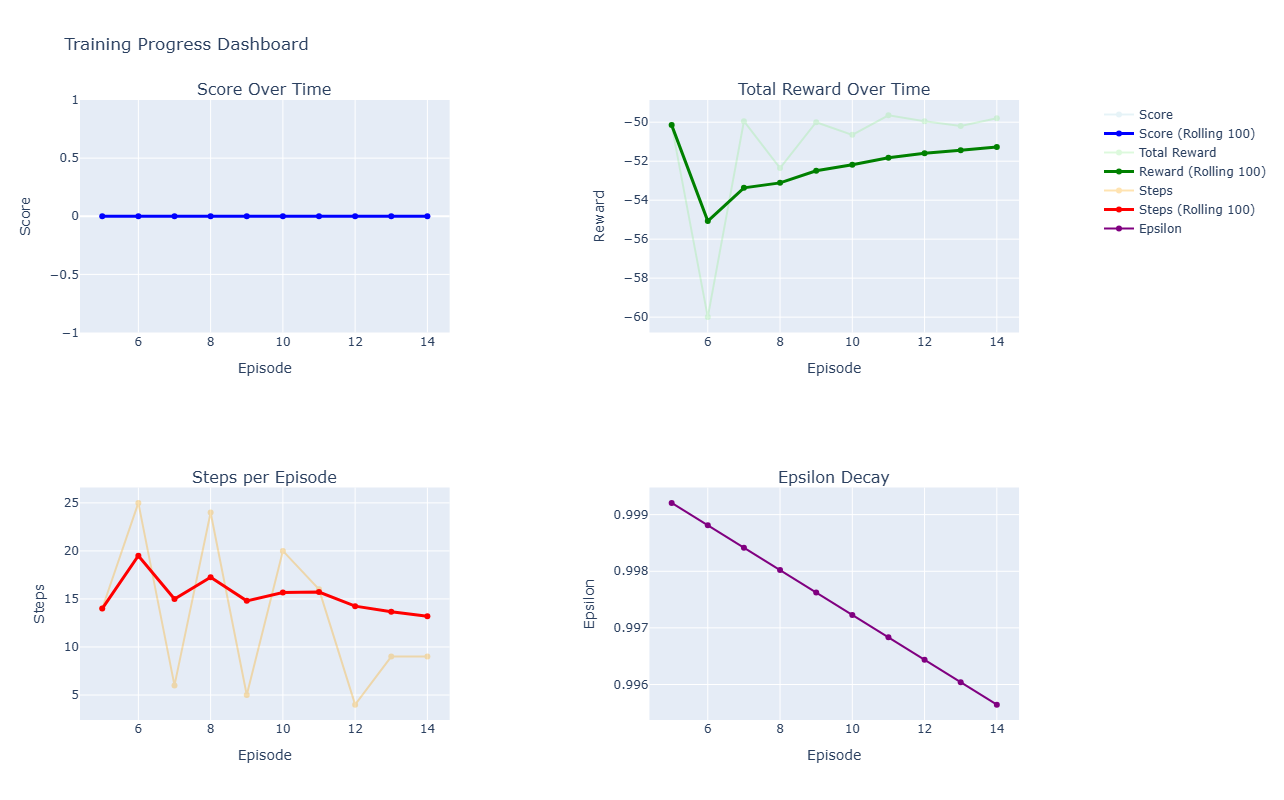


=== Training Summary ===
Total Episodes: 10
Average Score: 0.00
Best Score: 0
Average Reward: -51.27
Average Steps: 13.20

Improvement: 0.0% (from 0.00 to 0.00)


In [3]:
# Create interactive training progress visualization
if df is not None:
    # Calculate rolling averages
    window_size = 100
    df['score_rolling'] = df['score'].rolling(window=window_size, min_periods=1).mean()
    df['reward_rolling'] = df['total_reward'].rolling(window=window_size, min_periods=1).mean()
    df['steps_rolling'] = df['steps'].rolling(window=window_size, min_periods=1).mean()
    
    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Score Over Time', 'Total Reward Over Time', 
                       'Steps per Episode', 'Epsilon Decay'),
        specs=[[{"secondary_y": True}, {"secondary_y": True}],
               [{"secondary_y": False}, {"secondary_y": False}]]
    )
    
    # Score plot
    fig.add_trace(go.Scatter(x=df['episode'], y=df['score'], 
                            name='Score', opacity=0.3, line=dict(color='lightblue')),
                  row=1, col=1)
    fig.add_trace(go.Scatter(x=df['episode'], y=df['score_rolling'], 
                            name=f'Score (Rolling {window_size})', line=dict(color='blue', width=3)),
                  row=1, col=1)
    
    # Reward plot
    fig.add_trace(go.Scatter(x=df['episode'], y=df['total_reward'], 
                            name='Total Reward', opacity=0.3, line=dict(color='lightgreen')),
                  row=1, col=2)
    fig.add_trace(go.Scatter(x=df['episode'], y=df['reward_rolling'], 
                            name=f'Reward (Rolling {window_size})', line=dict(color='green', width=3)),
                  row=1, col=2)
    
    # Steps plot
    fig.add_trace(go.Scatter(x=df['episode'], y=df['steps'], 
                            name='Steps', opacity=0.3, line=dict(color='orange')),
                  row=2, col=1)
    fig.add_trace(go.Scatter(x=df['episode'], y=df['steps_rolling'], 
                            name=f'Steps (Rolling {window_size})', line=dict(color='red', width=3)),
                  row=2, col=1)
    
    # Epsilon plot (if available)
    if 'epsilon' in df.columns:
        fig.add_trace(go.Scatter(x=df['episode'], y=df['epsilon'], 
                                name='Epsilon', line=dict(color='purple', width=2)),
                      row=2, col=2)
    
    fig.update_layout(height=800, title_text="Training Progress Dashboard", showlegend=True)
    fig.update_xaxes(title_text="Episode")
    fig.update_yaxes(title_text="Score", row=1, col=1)
    fig.update_yaxes(title_text="Reward", row=1, col=2)
    fig.update_yaxes(title_text="Steps", row=2, col=1)
    fig.update_yaxes(title_text="Epsilon", row=2, col=2)
    
    fig.show()
    
    # Print summary statistics
    print("\n=== Training Summary ===")
    print(f"Total Episodes: {len(df)}")
    print(f"Average Score: {df['score'].mean():.2f}")
    print(f"Best Score: {df['score'].max()}")
    print(f"Average Reward: {df['total_reward'].mean():.2f}")
    print(f"Average Steps: {df['steps'].mean():.2f}")
    
    # Show improvement over time
    first_100 = df.head(100)['score'].mean()
    last_100 = df.tail(100)['score'].mean()
    improvement = ((last_100 - first_100) / first_100 * 100) if first_100 > 0 else 0
    print(f"\nImprovement: {improvement:.1f}% (from {first_100:.2f} to {last_100:.2f})")

## 3. Strategy Analysis

Analyze performance across different strategies and training stages.

In [4]:
# Strategy performance analysis
if df is not None and 'strategy_name' in df.columns:
    # Group by strategy
    strategy_stats = df.groupby('strategy_name').agg({
        'score': ['mean', 'std', 'max', 'count'],
        'total_reward': ['mean', 'std'],
        'steps': ['mean', 'std']
    }).round(2)
    
    print("Strategy Performance Comparison:")
    display(strategy_stats)
    
    # Create strategy comparison visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Score distribution by strategy
    sns.boxplot(data=df, x='strategy_name', y='score', ax=axes[0,0])
    axes[0,0].set_title('Score Distribution by Strategy')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Reward distribution by strategy
    sns.boxplot(data=df, x='strategy_name', y='total_reward', ax=axes[0,1])
    axes[0,1].set_title('Reward Distribution by Strategy')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Strategy usage over time
    strategy_over_time = df.groupby(['episode', 'strategy_name']).size().unstack(fill_value=0)
    strategy_over_time.plot(kind='area', stacked=True, ax=axes[1,0], alpha=0.7)
    axes[1,0].set_title('Strategy Usage Over Time')
    axes[1,0].set_xlabel('Episode')
    axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Performance trends by strategy
    for strategy in df['strategy_name'].unique():
        strategy_data = df[df['strategy_name'] == strategy]
        strategy_data['score_rolling'] = strategy_data['score'].rolling(50, min_periods=1).mean()
        axes[1,1].plot(strategy_data['episode'], strategy_data['score_rolling'], 
                      label=strategy, alpha=0.8, linewidth=2)
    
    axes[1,1].set_title('Performance Trends by Strategy')
    axes[1,1].set_xlabel('Episode')
    axes[1,1].set_ylabel('Rolling Average Score')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("Strategy analysis requires 'strategy_name' column in the data.")

Strategy analysis requires 'strategy_name' column in the data.


## 4. Reward Component Analysis

Analyze individual reward components to understand what drives performance.

Found reward components: ['avg_reward_100', 'reward_rolling']


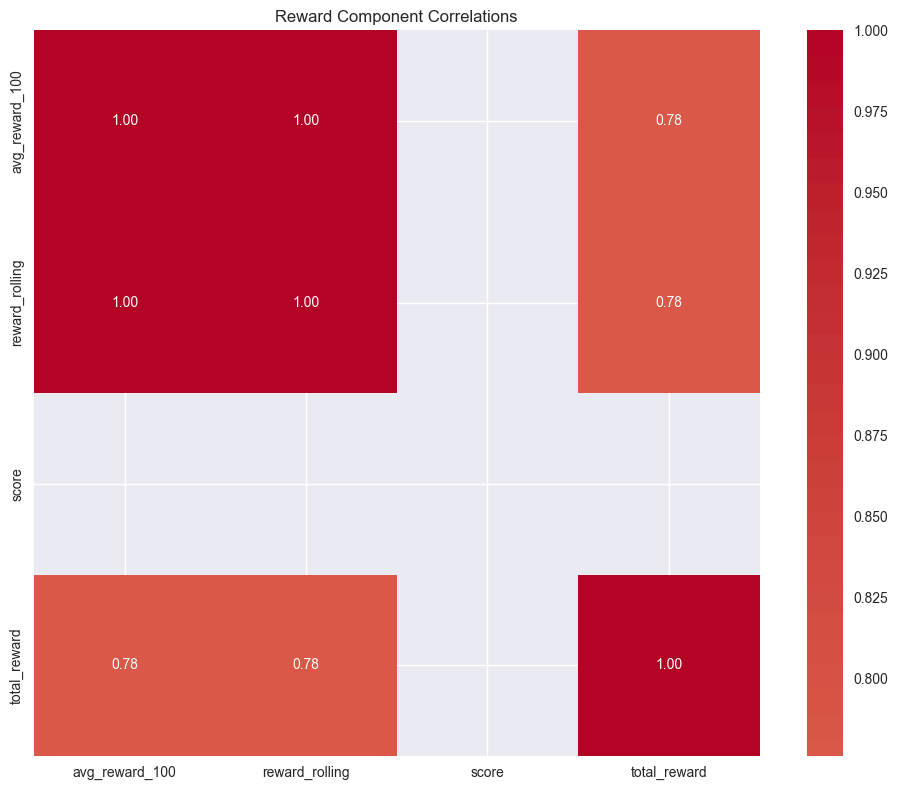

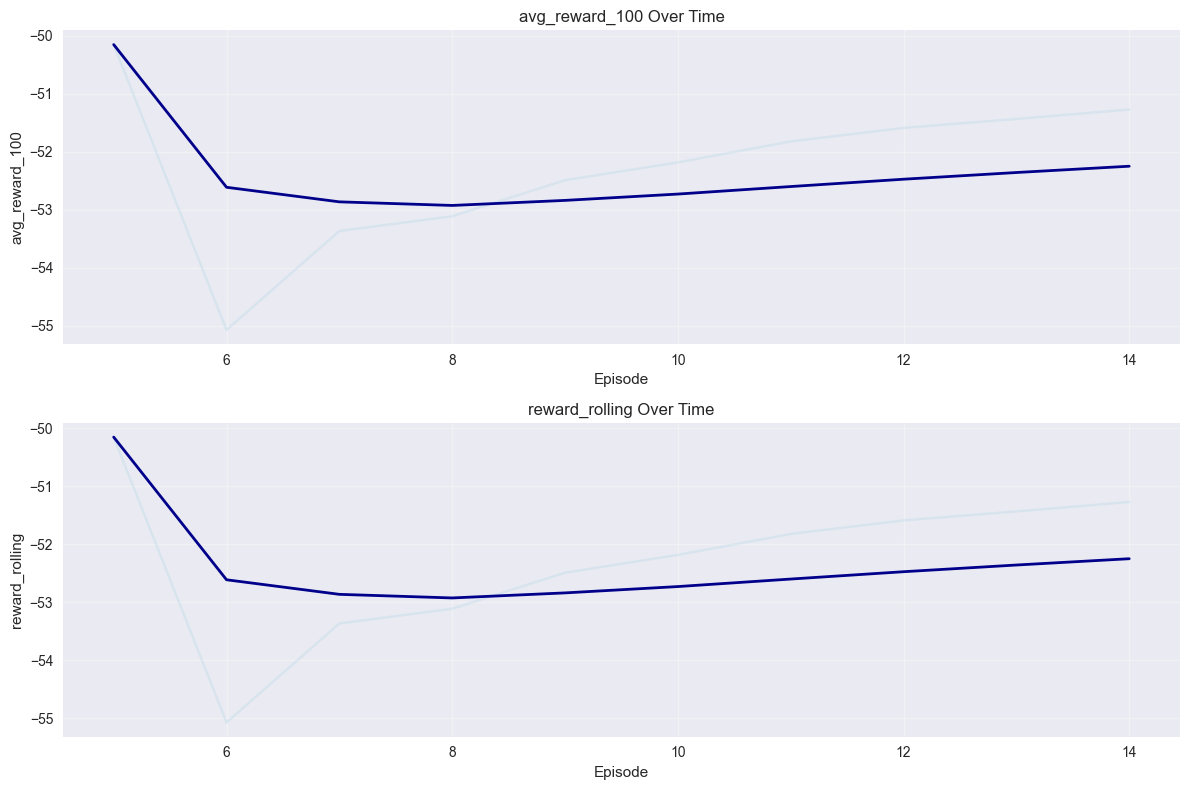

In [5]:
# Reward component analysis
if df is not None:
    # Look for reward component columns
    reward_columns = [col for col in df.columns if 'reward' in col.lower() and col != 'total_reward']
    
    if reward_columns:
        print(f"Found reward components: {reward_columns}")
        
        # Create correlation matrix
        reward_data = df[reward_columns + ['score', 'total_reward']]
        correlation_matrix = reward_data.corr()
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, fmt='.2f')
        plt.title('Reward Component Correlations')
        plt.tight_layout()
        plt.show()
        
        # Reward component trends
        fig, axes = plt.subplots(len(reward_columns), 1, figsize=(12, 4*len(reward_columns)))
        if len(reward_columns) == 1:
            axes = [axes]
        
        for i, col in enumerate(reward_columns):
            # Calculate rolling average
            rolling_avg = df[col].rolling(100, min_periods=1).mean()
            
            axes[i].plot(df['episode'], df[col], alpha=0.3, color='lightblue')
            axes[i].plot(df['episode'], rolling_avg, color='darkblue', linewidth=2)
            axes[i].set_title(f'{col} Over Time')
            axes[i].set_xlabel('Episode')
            axes[i].set_ylabel(col)
            axes[i].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    else:
        print("No individual reward components found in the data.")
        print("Available columns:", list(df.columns))

## 5. Performance Metrics Dashboard

Create a comprehensive dashboard with key performance indicators.

In [ ]:
# Performance metrics dashboard
if df is not None:
    # Calculate key metrics
    total_episodes = len(df)
    avg_score = df['score'].mean()
    max_score = df['score'].max()
    success_rate = (df['score'] > 0).mean() * 100  # Episodes where at least 1 food was eaten
    
    # Calculate learning efficiency (episodes to reach certain milestones)
    milestones = [5, 10, 15, 20]
    episodes_to_milestone = {}
    
    for milestone in milestones:
        episodes_reaching = df[df['score'] >= milestone]
        if not episodes_reaching.empty:
            episodes_to_milestone[milestone] = episodes_reaching['episode'].iloc[0]
        else:
            episodes_to_milestone[milestone] = None
    
    # Create metrics summary
    print("\n" + "="*50)
    print("           PERFORMANCE DASHBOARD")
    print("="*50)
    print(f"📊 Total Episodes Trained: {total_episodes:,}")
    print(f"🎯 Average Score: {avg_score:.2f}")
    print(f"🏆 Best Score: {max_score}")
    print(f"✅ Success Rate: {success_rate:.1f}%")
    print(f"⚡ Average Steps: {df['steps'].mean():.1f}")
    
    print("\n🎖️  Learning Milestones:")
    for milestone, episode in episodes_to_milestone.items():
        if episode is not None:
            print(f"   Score {milestone:2d}: Episode {episode:,}")
        else:
            print(f"   Score {milestone:2d}: Not reached")
    
    # Recent performance (last 10% of episodes)
    recent_episodes = int(total_episodes * 0.1)
    recent_data = df.tail(recent_episodes)
    
    print(f"\n📈 Recent Performance (Last {recent_episodes} episodes):")
    print(f"   Average Score: {recent_data['score'].mean():.2f}")
    print(f"   Best Score: {recent_data['score'].max()}")
    print(f"   Success Rate: {(recent_data['score'] > 0).mean() * 100:.1f}%")
    
    # Training stability (coefficient of variation in recent episodes)
    cv = recent_data['score'].std() / recent_data['score'].mean() if recent_data['score'].mean() > 0 else float('inf')
    stability = "High" if cv < 0.5 else "Medium" if cv < 1.0 else "Low"
    print(f"📊 Training Stability: {stability} (CV: {cv:.2f})")
    
    print("="*50)

## 6. Export Analysis Results

Save analysis results and visualizations for reporting.

In [ ]:
# Export analysis results
if df is not None:
    # Create output directory
    output_dir = Path('../analysis_outputs')
    output_dir.mkdir(exist_ok=True)
    
    # Save summary statistics
    summary_stats = {
        'total_episodes': len(df),
        'avg_score': df['score'].mean(),
        'max_score': df['score'].max(),
        'avg_reward': df['total_reward'].mean(),
        'avg_steps': df['steps'].mean(),
        'success_rate': (df['score'] > 0).mean() * 100
    }
    
    # Save to CSV
    summary_df = pd.DataFrame([summary_stats])
    summary_df.to_csv(output_dir / 'training_summary.csv', index=False)
    
    print(f"Analysis results saved to: {output_dir}")
    print("Files created:")
    print(f"  - training_summary.csv")
    
    # Optionally save processed data with rolling averages
    if 'score_rolling' in df.columns:
        df.to_csv(output_dir / 'processed_training_data.csv', index=False)
        print(f"  - processed_training_data.csv")
    
    print("\n✅ Analysis complete!")